# Integração Colab e google Drive
Sequência de passos para configurar o Colab para usar uma pasta do google drive e assim garantir que os dados sejam salvos.

__Objetivos:__
- montar o drive no colab
- baixar o arquivo csv do dataset telemetry e salvar numa pasta do drive.
- carregar o arquivo no pandas dataframe
- visualizar a coluna temperatura num gráfico de linha.

__Como Importar esse notebook para o colab:__
1. Arquivo > Abrir Notebook
1. Clicar aba GitHub
1. Inserir a URL: https://github.com/fscheidt/iotdb-21/blob/master/notebooks/Colab_com_drive.ipynb
1. Clicar em notebooks/Colab_com_drive.ipynb

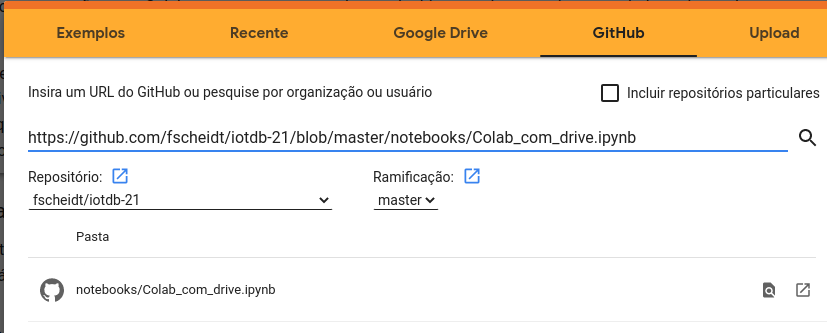


### Montar Drive na pasta gdrive
- montar a pasta do drive no diretório /content/gdrive
- vai solicitar várias permissões

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Download do dataset telemetry

In [11]:
# criar a pasta "data" no Drive para armazenar o arquivo csv.
!mkdir /content/gdrive/MyDrive/data

In [22]:
# baixar csv do github e salvar na pasta data
!wget -O /content/gdrive/MyDrive/data/iot_telemetry.csv https://raw.githubusercontent.com/fscheidt/iotdb-21/master/dataset/telemetry/iot_telemetry_data.csv

--2021-12-18 00:59:13--  https://raw.githubusercontent.com/fscheidt/iotdb-21/master/dataset/telemetry/iot_telemetry_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61926558 (59M) [text/plain]
Saving to: ‘/content/gdrive/MyDrive/data/iot_telemetry.csv’

/content/gdrive/MyD 100%[===================>]  59.06M  47.4MB/s    in 1.2s    

2021-12-18 00:59:15 (47.4 MB/s) - ‘/content/gdrive/MyDrive/data/iot_telemetry.csv’ saved [61926558/61926558]



In [33]:
# verificar se o arquivo foi baixado:
!ls /content/gdrive/MyDrive/data

iot_telemetry.csv


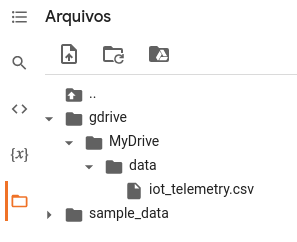

## Carregar csv no pandas
Para visualização dos dados e gerar estatísticas básicas.

In [15]:
import pandas as pd

In [24]:
# carrega arquivo csv:
df = pd.read_csv("/content/gdrive/MyDrive/data/iot_telemetry.csv")

In [36]:
# visualizar as 10 primeiras linhas do dataframe
df.head(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.000000
6,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.000000
9,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.600000


In [29]:
# quantas linhas e colunas há nesse dataset?
df.shape

(405184, 9)

In [38]:
# estatísticas básicas: contagem, média, desvio padrão, min e max
df.describe()

,ts,co,humidity,lpg,smoke,temp
count,4.051840e+05,405184.000000,405184.000000,405184.000000,405184.000000,405184.000000
mean,1.594858e+09,0.004639,60.511694,0.007237,0.019264,22.453987
std,1.994984e+05,0.001250,11.366489,0.001444,0.004086,2.698347
min,1.594512e+09,0.001171,1.100000,0.002693,0.006692,0.000000
25%,1.594686e+09,0.003919,51.000000,0.006456,0.017024,19.900000
50%,1.594858e+09,0.004812,54.900000,0.007489,0.019950,22.200000
75%,1.595031e+09,0.005409,74.300003,0.008150,0.021838,23.600000
max,1.595203e+09,0.014420,99.900002,0.016567,0.046590,30.600000


In [37]:
# Qual a temperatura máxima registrada pelo sensor?
df['temp'].max()

30.60000038146973

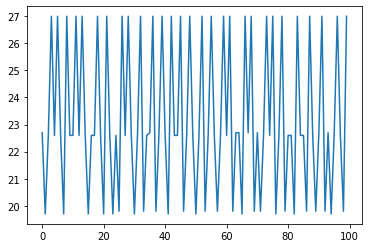

In [28]:
# plotar os 100 primeiros registros da coluna temperatura:
import matplotlib.pyplot as plt
plt.plot(df['temp'][:100])